# Đồ án Dự Đoán Giá Nhà 

## I. Thu thập dữ liệu bằng Selenium


### 1. Import và cài đặt các thư viện cần thiết

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains, ScrollOrigin
import pandas as pd
from time import sleep
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

### 2. Thực hiện cào dữ liệu từ web https://batdongsan.com.vn/nha-dat-ban-tp-hcm

In [2]:


# Khởi tạo ChromeOptions
options = webdriver.ChromeOptions()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)
# options.add_argument("--headless")  # Bỏ comment nếu muốn chạy nền
# Đường dẫn tới ChromeDriver
service = Service("C:/Users/ADMIN/.cache/selenium/chromedriver/win64/138.0.7204.94/chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)

# Xóa navigator.webdriver
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', {
            get: () => undefined
        })
    """
})
base_url='https://batdongsan.com.vn/nha-dat-ban-tp-hcm'
# driver.get(url)

def get_item_info(item):
    info = {}
    try:
        info['title']=item.find_element(By.CLASS_NAME,'js__card-title').text
    except:
        info['title']=np.nan
    try:
        info['price'] = item.find_element(By.CLASS_NAME, 're__card-config-price').text
    except:
        info['price'] =np.nan

    try:
        info['square'] = item.find_element(By.CLASS_NAME, 're__card-config-area').text
    except:
        info['square'] = np.nan

    try:
        info['price_per_square'] = item.find_element(By.CLASS_NAME, 're__card-config-price_per_m2').text
    except:
        info['price_per_square'] = np.nan

    try:
        info['bedroom'] = item.find_element(By.CLASS_NAME, 're__card-config-bedroom').text
    except:
        info['bedroom'] = np.nan

    try:
        info['wc'] = item.find_element(By.CLASS_NAME, 're__card-config-toilet').text
    except:
        info['wc'] = np.nan
    try:
        info['location']=item.find_element(By.CLASS_NAME,'re__card-location').text
    except:
        info['location']=np.nan

    return info
sleep(5)
    
results = []
for p in range(1, 50):
    if p == 1:
        url = base_url
    else:
        url = f'{base_url}/p{p}'

    driver.get(url)
    print(f"📄 Đang xử lý trang {p}...")
    time.sleep(5)

    # Chờ xác minh CAPTCHA nếu bị chặn
    while True:
        try:
            list_items = driver.find_element(By.CLASS_NAME, 'js__srp-list')
            items = list_items.find_elements(By.CLASS_NAME, 'js__card-full-web')

            # Nếu danh sách item hợp lệ thì break để tiếp tục
            if len(items) > 0:
                print(f"✅ Tìm thấy {len(items)} tin đăng.")
                break
            else:
                raise Exception("Danh sách rỗng")
        except:
            print("⚠️ Có thể bị CAPTCHA hoặc lỗi tải trang.")
            input("👉 Vui lòng xác minh CAPTCHA thủ công rồi nhấn Enter để tiếp tục...")

    # Xử lý các tin trong trang
    for i in range(len(items)):
        info = get_item_info(item=items[i])
        results.append(info)

📄 Đang xử lý trang 1...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 2...
⚠️ Có thể bị CAPTCHA hoặc lỗi tải trang.
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 3...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 4...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 5...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 6...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 7...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 8...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 9...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 10...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 11...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 12...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 13...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 14...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 15...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 16...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 17...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 18...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 19...
✅ Tìm thấy 20 tin đăng.
📄 Đang xử lý trang 20...
✅ Tìm thấy 2

### 3. Chuyển dữ liệu vừa cào được về Dataframe và lưu vô file excel

In [3]:
df=pd.DataFrame(results)

In [4]:
df

,title,price,square,price_per_square,bedroom,wc,location
0,CENTERY 3PN GIÁ 8TỶ6 TẦNG CAO VIEW CÔNG VIÊN,"8,6 tỷ",121 m²,"71,07 tr/m²",3,3,"·\nTân Phú, Hồ Chí Minh"
1,"BÁN LỖ CĂN HỘ 3PN MASTERI CENTRE POINT, GIÁ 4....","4,8 tỷ",92 m²,"52,17 tr/m²",3,2,"·\nQuận 9, Hồ Chí Minh"
2,"CONIC BÌNH CHÁNH: CHỈ CẦN 400TR NHẬN NHÀ, NHẬN...","2,4 tỷ",85 m²,"28,24 tr/m²",2,2,"·\nBình Chánh, Hồ Chí Minh"
3,EM HIỆP CHUYÊN BÁN CĂN HỘ GRAND MARINA SAIGON....,32 tỷ,78 m²,"410,26 tr/m²",2,NaN,"·\nQuận 1, Hồ Chí Minh"
4,CHỈ CẦN TRẢ TRƯỚC 690 TRIỆU SỞ HỮU CĂN ...,"2,36 tỷ",85 m²,"27,73 tr/m²",2,2,"·\nBình Chánh, Hồ Chí Minh"
...,...,...,...,...,...,...,...
975,"Bán nhà hẻm 1942 Huỳnh Tấn Phát, Thị Trấn Nhà Bè","5,29 tỷ","47,6 m²","111,13 tr/m²",5,3,"Nhà Bè, Hồ Chí Minh"
976,"Căn hộ 2PN2WC chỉ 2,9tỷ trung tâm Quận 2 thanh...","2,9 tỷ",56 m²,"51,79 tr/m²",2,2,"Quận 2, Hồ Chí Minh"
977,Nhà phố căn góc mặt tiền kinh doanh KDC An Sươ...,22 tỷ,"112,5 m²","195,56 tr/m²",NaN,NaN,"Quận 12, Hồ Chí Minh"
978,Siêu Phẩm Khan Hiếm Xây Building ngay Nguyễn T...,129 tỷ,245 m²,"526,53 tr/m²",6,7,"Quận 1, Hồ Chí Minh"


In [ ]:
df.to_excel('Data\Data_houseAI.xlsx',index=False)

### 4. Đọc dữ liều từ file excel

In [4]:
df_house=pd.read_excel('Data\Data_houseAI.xlsx')

In [5]:
df_house

,title,price,square,price_per_square,bedroom,wc,location
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...","4,8 tỷ",82 m²,"58,54 tr/m²",2.0,2.0,"·\nQuận 9, Hồ Chí Minh"
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,"3,5 tỷ",81 m²,"43,21 tr/m²",3.0,2.0,"·\nQuận 9, Hồ Chí Minh"
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,890 triệu,"51,3 m²","17,35 tr/m²",1.0,1.0,"·\nQuận 9, Hồ Chí Minh"
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,"7,5 tỷ",121 m²,"61,98 tr/m²",3.0,2.0,"·\nTân Phú, Hồ Chí Minh"
4,CHUYÊN BÁN CĂN HỘ GIÁ RẺ NHẤT THỊ TRƯỜNG MAS- ...,Giá thỏa thuận,70 m²,NaN,2.0,NaN,"·\nQuận 2, Hồ Chí Minh"
...,...,...,...,...,...,...,...
975,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...","2,9 tỷ",68 m²,"42,65 tr/m²",2.0,2.0,"Thủ Đức, Hồ Chí Minh"
976,BÁN CĂN GỐC 4PN VIEW TRỰC DIỆN KÊNH ĐÀO ĐẸP NH...,Giá thỏa thuận,140 m²,NaN,4.0,3.0,"Quận 2, Hồ Chí Minh"
977,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,"2,56 tỷ",80 m²,32 tr/m²,NaN,NaN,"Nhà Bè, Hồ Chí Minh"
978,Mặt tiền Hai Bà Trưng trung tâm phường Tân Địn...,"26,5 tỷ",76 m²,"348,68 tr/m²",NaN,NaN,"Quận 1, Hồ Chí Minh"


# II. Khám phá dữ liệu

## 1. Tổng quan dữ liệu

### 1.1 Xem định dạng dữ liệu

In [14]:
df_house.shape


(980, 7)

Ta thấy dữ liệu sau khi cào về có 980 dòng và 7 cột

### 1.2. Tóm tắt thông tin tổng quan

In [15]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             961 non-null    object 
 1   price             961 non-null    object 
 2   square            961 non-null    object 
 3   price_per_square  904 non-null    object 
 4   bedroom           731 non-null    float64
 5   wc                597 non-null    float64
 6   location          961 non-null    object 
dtypes: float64(2), object(5)
memory usage: 53.7+ KB


#### Dựa vào việc tóm tắt thông tin tổng quan ta thấy được một số cột chứa giá trị thiếu:

price, square, location, title: thiếu 19 dòng

price_per_square: thiếu 76 dòng

bedroom: thiếu 249 dòng (~25%)

wc: thiếu 383 dòng (~39%)
- Các cột như price, square, price_per_square có kiểu object, cần được chuyển thành float để phân tích.
- Các giá trị của cột bị thiếu cũng nên được xử lý hơp lý bằng cách lấy giá trị trung bình hoặc lược bỏ nếu giá trị null quá nhiều hay quá ít.

### 1.3. Thống kê tổng quan toàn bộ các cột trong DataFrame

In [16]:
df_house.describe(include='all')

,title,price,square,price_per_square,bedroom,wc,location
count,961,961,961,904,731.000000,597.000000,961
unique,954,394,315,760,NaN,NaN,43
top,"CẦN BÁN GẤP - CĂN 2PN , 2WC VIEW SÔNG, HƯỚNG M...",Giá thỏa thuận,70 m²,68 tr/m²,NaN,NaN,"Quận 2, Hồ Chí Minh"
freq,3,57,40,7,NaN,NaN,126
mean,NaN,NaN,NaN,NaN,3.191518,2.859296,NaN
std,NaN,NaN,NaN,NaN,3.210682,3.178731,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,4.000000,3.000000,NaN


#### Dựa vào việc thống kê tổng quan các cột trong DataFrame ta thấy được:
- bedroom và wc: Có giá trị max = 34 → nên kiểm tra các dòng này để xử lý ngoại lệ.

- price, square, price_per_square: cần tách/chuyển đổi từ dạng chuỗi sang số (float) để phân tích.

- Giá thỏa thuận nên chuyển thành NaN.

# III. Tiền xử lý dữ liệu

In [6]:
df_house.head()

,title,price,square,price_per_square,bedroom,wc,location
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...","4,8 tỷ",82 m²,"58,54 tr/m²",2.0,2.0,"·\nQuận 9, Hồ Chí Minh"
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,"3,5 tỷ",81 m²,"43,21 tr/m²",3.0,2.0,"·\nQuận 9, Hồ Chí Minh"
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,890 triệu,"51,3 m²","17,35 tr/m²",1.0,1.0,"·\nQuận 9, Hồ Chí Minh"
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,"7,5 tỷ",121 m²,"61,98 tr/m²",3.0,2.0,"·\nTân Phú, Hồ Chí Minh"
4,CHUYÊN BÁN CĂN HỘ GIÁ RẺ NHẤT THỊ TRƯỜNG MAS- ...,Giá thỏa thuận,70 m²,NaN,2.0,NaN,"·\nQuận 2, Hồ Chí Minh"


## 1. Chuyển kiểu dữ liệu và dạng số

In [17]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             961 non-null    object 
 1   price             961 non-null    object 
 2   square            961 non-null    object 
 3   price_per_square  904 non-null    object 
 4   bedroom           731 non-null    float64
 5   wc                597 non-null    float64
 6   location          961 non-null    object 
dtypes: float64(2), object(5)
memory usage: 53.7+ KB


### 1.1. Tạo hàm để chuyển dữ liệu

#### 1.1.1. Chuyển các giá trị cột price

In [18]:
def convert_price(p):
    if isinstance(p,str):
        p=p.replace(',','.').strip()
        if 'tỷ' in p:
            return float(p.replace('tỷ','').strip())*1_000_000_000
        elif 'triệu' in p:
             return float(p.replace('triệu','').strip())*1_000_000
    # Khi gặp giá trị "Giá thỏa thuân" hoặc rỗng sẽ trả về NaN
    return None
df_house['price']=df_house['price'].apply(convert_price)

In [19]:
df_house.head()

,title,price,square,price_per_square,bedroom,wc,location
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82 m²,"58,54 tr/m²",2.0,2.0,"·\nQuận 9, Hồ Chí Minh"
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81 m²,"43,21 tr/m²",3.0,2.0,"·\nQuận 9, Hồ Chí Minh"
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,"51,3 m²","17,35 tr/m²",1.0,1.0,"·\nQuận 9, Hồ Chí Minh"
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121 m²,"61,98 tr/m²",3.0,2.0,"·\nTân Phú, Hồ Chí Minh"
4,CHUYÊN BÁN CĂN HỘ GIÁ RẺ NHẤT THỊ TRƯỜNG MAS- ...,NaN,70 m²,NaN,2.0,NaN,"·\nQuận 2, Hồ Chí Minh"


#### 1.1.2. Chuyển các giá trị cột square (m2)

In [20]:
# regex=False: chỉ định rằng 'm²' là chuỗi thông thường chứ không phải biểu thức chính quy (regex).
df_house['square'] = (
    df_house['square']
    .astype(str)
    .str.replace('m²', '', regex=False)
    .str.replace('.', '', regex=False)    # XÓA tất cả dấu chấm
    .str.replace(',', '.', regex=False)   # Đổi dấu , thành . để dùng float
    .str.strip()
)

# Cuối cùng chuyển sang float, bỏ lỗi
df_house['square'] = pd.to_numeric(df_house['square'], errors='coerce')


In [21]:
df_house

,title,price,square,price_per_square,bedroom,wc,location
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,"58,54 tr/m²",2.0,2.0,"·\nQuận 9, Hồ Chí Minh"
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,"43,21 tr/m²",3.0,2.0,"·\nQuận 9, Hồ Chí Minh"
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,"17,35 tr/m²",1.0,1.0,"·\nQuận 9, Hồ Chí Minh"
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,"61,98 tr/m²",3.0,2.0,"·\nTân Phú, Hồ Chí Minh"
4,CHUYÊN BÁN CĂN HỘ GIÁ RẺ NHẤT THỊ TRƯỜNG MAS- ...,NaN,70.0,NaN,2.0,NaN,"·\nQuận 2, Hồ Chí Minh"
...,...,...,...,...,...,...,...
975,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,"42,65 tr/m²",2.0,2.0,"Thủ Đức, Hồ Chí Minh"
976,BÁN CĂN GỐC 4PN VIEW TRỰC DIỆN KÊNH ĐÀO ĐẸP NH...,NaN,140.0,NaN,4.0,3.0,"Quận 2, Hồ Chí Minh"
977,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32 tr/m²,NaN,NaN,"Nhà Bè, Hồ Chí Minh"
978,Mặt tiền Hai Bà Trưng trung tâm phường Tân Địn...,2.650000e+10,76.0,"348,68 tr/m²",NaN,NaN,"Quận 1, Hồ Chí Minh"


#### 1.1.3. Chuyển các giá trị cột Price_Per_Square (tr/m2)

In [22]:
df_house['price_per_square'] = df_house['price_per_square'].str.replace('tr/m²', '', regex=False)
df_house['price_per_square'] = df_house['price_per_square'].str.replace(',', '.')
df_house['price_per_square'] = pd.to_numeric(df_house['price_per_square'], errors='coerce')


In [23]:
df_house

,title,price,square,price_per_square,bedroom,wc,location
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,58.54,2.0,2.0,"·\nQuận 9, Hồ Chí Minh"
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,43.21,3.0,2.0,"·\nQuận 9, Hồ Chí Minh"
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,17.35,1.0,1.0,"·\nQuận 9, Hồ Chí Minh"
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,61.98,3.0,2.0,"·\nTân Phú, Hồ Chí Minh"
4,CHUYÊN BÁN CĂN HỘ GIÁ RẺ NHẤT THỊ TRƯỜNG MAS- ...,NaN,70.0,NaN,2.0,NaN,"·\nQuận 2, Hồ Chí Minh"
...,...,...,...,...,...,...,...
975,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,42.65,2.0,2.0,"Thủ Đức, Hồ Chí Minh"
976,BÁN CĂN GỐC 4PN VIEW TRỰC DIỆN KÊNH ĐÀO ĐẸP NH...,NaN,140.0,NaN,4.0,3.0,"Quận 2, Hồ Chí Minh"
977,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32.00,NaN,NaN,"Nhà Bè, Hồ Chí Minh"
978,Mặt tiền Hai Bà Trưng trung tâm phường Tân Địn...,2.650000e+10,76.0,348.68,NaN,NaN,"Quận 1, Hồ Chí Minh"


#### Sau khi đã chuyển các cột về dạng số ta được kết quả như sau:

In [24]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             961 non-null    object 
 1   price             904 non-null    float64
 2   square            961 non-null    float64
 3   price_per_square  899 non-null    float64
 4   bedroom           731 non-null    float64
 5   wc                597 non-null    float64
 6   location          961 non-null    object 
dtypes: float64(5), object(2)
memory usage: 53.7+ KB


#### 1.1.4. Chuyển các giá trị cột location

##### 1.1.4.1 Tách cột location

In [25]:
df_house['location'] = (
    df_house['location']
    .str.replace('\n', '', regex=False)     # Xoá ký tự xuống dòng
    .str.replace('·', '', regex=False)      # Xoá ký tự bullet ·
    .str.strip()
)


df_house['district']=df_house['location'].str.split(',',n=1).str[0].str.strip()

In [26]:
df_house

,title,price,square,price_per_square,bedroom,wc,location,district
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,58.54,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,43.21,3.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,17.35,1.0,1.0,"Quận 9, Hồ Chí Minh",Quận 9
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,61.98,3.0,2.0,"Tân Phú, Hồ Chí Minh",Tân Phú
4,CHUYÊN BÁN CĂN HỘ GIÁ RẺ NHẤT THỊ TRƯỜNG MAS- ...,NaN,70.0,NaN,2.0,NaN,"Quận 2, Hồ Chí Minh",Quận 2
...,...,...,...,...,...,...,...,...
975,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,42.65,2.0,2.0,"Thủ Đức, Hồ Chí Minh",Thủ Đức
976,BÁN CĂN GỐC 4PN VIEW TRỰC DIỆN KÊNH ĐÀO ĐẸP NH...,NaN,140.0,NaN,4.0,3.0,"Quận 2, Hồ Chí Minh",Quận 2
977,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32.00,NaN,NaN,"Nhà Bè, Hồ Chí Minh",Nhà Bè
978,Mặt tiền Hai Bà Trưng trung tâm phường Tân Địn...,2.650000e+10,76.0,348.68,NaN,NaN,"Quận 1, Hồ Chí Minh",Quận 1


In [70]:
df_house_num=df_house

## 2. Loại bỏ các giá trị NaN

### 2.1. Loại bỏ các giá trị Null ở cột title, location, district

#### Vì các giá trị Null ở ba cột title, location, distrinct khá thấp (19 dòng) nên ta sẽ loại bỏ các dòng đó.

In [27]:
df_house.isnull().sum()

title                19
price                76
square               19
price_per_square     81
bedroom             249
wc                  383
location             19
district             19
dtype: int64

In [28]:
# Xóa các dòng bị thiếu district hoặc location hoặc title
df_house = df_house.dropna(subset=['title', 'location', 'district'])

In [29]:
df_house.isnull().sum()

title                 0
price                57
square                0
price_per_square     62
bedroom             230
wc                  364
location              0
district              0
dtype: int64

### 2.2. Fill các giá trị Null ở cột price


#### Ta thấy các dữ liệu bị thiếu ở cột Price chiếm 5.9% >5% nên ta sẽ fill các giá trị Null đó bằng giá trị trung bình theo Price

In [30]:
(len(df_house[df_house['price'].isnull()])/len(df_house))*100

# Ta thấy dữ liệu thiếu đã quá 5% nên ta sẽ fill nó.

5.931321540062435

In [31]:
df_house['price']=df_house['price'].fillna(df_house['price'].median())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18476\711429653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['price']=df_house['price'].fillna(df_house['price'].median())


In [32]:
df_house.isnull().sum()

title                 0
price                 0
square                0
price_per_square     62
bedroom             230
wc                  364
location              0
district              0
dtype: int64

### 2.3. Fill các giá trị Null ở cột price_per_square

#### Ta sẽ fill các giá trị Null ở trường price_per_square bằng cách lấy các giá trị Price/Square

In [33]:
df_house.loc[df_house['price_per_square'].isnull(), 'price_per_square']=df_house.loc[df_house['price_per_square'].isnull(),'price']/df_house.loc[df_house['price_per_square'].isnull(),'square']

In [34]:
df_house.isnull().sum()

title                 0
price                 0
square                0
price_per_square      0
bedroom             230
wc                  364
location              0
district              0
dtype: int64

### 2.4. Fill các giá trị Null ở 2 cột còn lại wc, bedroom

#### Tương tự vì giá trị Wc, bedroom chiếm số lượng NaN khá lớn nên ta sẽ Fill bằng giá trị trung bình

In [36]:
# Điền giá trị trung bình
df_house['bedroom'] = df_house['bedroom'].fillna(df_house['bedroom'].median())
df_house['wc'] = df_house['wc'].fillna(df_house['wc'].median())


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18476\3433369532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['bedroom'] = df_house['bedroom'].fillna(df_house['bedroom'].median())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18476\3433369532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['wc'] = df_house['wc'].fillna(df_house['wc'].median())


In [37]:
df_house.isnull().sum()

title               0
price               0
square              0
price_per_square    0
bedroom             0
wc                  0
location            0
district            0
dtype: int64

## 3. Giải quyết các giá trị bị duplicated

In [38]:
df_house.duplicated().sum()

7

In [39]:
df_duplicated=df_house[df_house.duplicated(keep=False)]
df_duplicated

,title,price,square,price_per_square,bedroom,wc,location,district
41,EM HIỆP CHUYÊN BÁN CĂN HỘ GRAND MARINA SAIGON....,2.310000e+10,56.68,407.55,1.0,1.0,"Quận 1, Hồ Chí Minh",Quận 1
124,EM HIỆP CHUYÊN BÁN CĂN HỘ GRAND MARINA SAIGON....,2.310000e+10,56.68,407.55,1.0,1.0,"Quận 1, Hồ Chí Minh",Quận 1
138,"CẦN BÁN GẤP - CĂN 2PN , 2WC VIEW SÔNG, HƯỚNG M...",3.740000e+09,66.50,56.30,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
173,"CẦN BÁN GẤP - CĂN 2PN , 2WC VIEW SÔNG, HƯỚNG M...",3.740000e+09,66.50,56.30,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
185,"CẦN BÁN GẤP - CĂN 2PN , 2WC VIEW SÔNG, HƯỚNG M...",3.740000e+09,66.50,56.30,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
279,Siêu phẩm khan hiếm!!MT Trương Văn Bang-Tạ Hiệ...,7.500000e+10,200.00,375.00,2.0,2.0,"Quận 2, Hồ Chí Minh",Quận 2
280,Siêu phẩm khan hiếm!!MT Trương Văn Bang-Tạ Hiệ...,7.500000e+10,200.00,375.00,2.0,2.0,"Quận 2, Hồ Chí Minh",Quận 2
596,Cần bán nhà phố LK khu biệt lập cao cấp mặt ti...,6.000000e+09,55.00,109.09,2.0,2.0,"Bình Tân, Hồ Chí Minh",Bình Tân
597,Cần bán nhà phố LK khu biệt lập cao cấp mặt ti...,6.000000e+09,55.00,109.09,2.0,2.0,"Bình Tân, Hồ Chí Minh",Bình Tân
639,Hàng ngộp! Nhà mặt tiền đường Nguyễn Tuyển Q2 ...,1.370000e+10,110.00,124.54,2.0,2.0,"Quận 2, Hồ Chí Minh",Quận 2


In [40]:
# Xóa các giá trị trùng, giữ dòng đầu tiên.
df_house=df_house.drop_duplicates()

In [41]:
df_house.duplicated().sum()

0

## 4. Giải quyết các giá trị bị Outlier

### 4.1. Giá trị outlier cột price

#### Viết hàm tính IQR và tìm ra các giá trị thuộc vùng outliers

In [42]:
def show_lower_upper_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower,upper

#### Ta thấy được các giá trị outliers nằm ngoài khoảng từ -13312500000.0 đến 34187500000.0

In [46]:
lower_price, upper_price= show_lower_upper_iqr(df_house,'price')
print(lower_price,upper_price)

-13312500000.0 34187500000.0


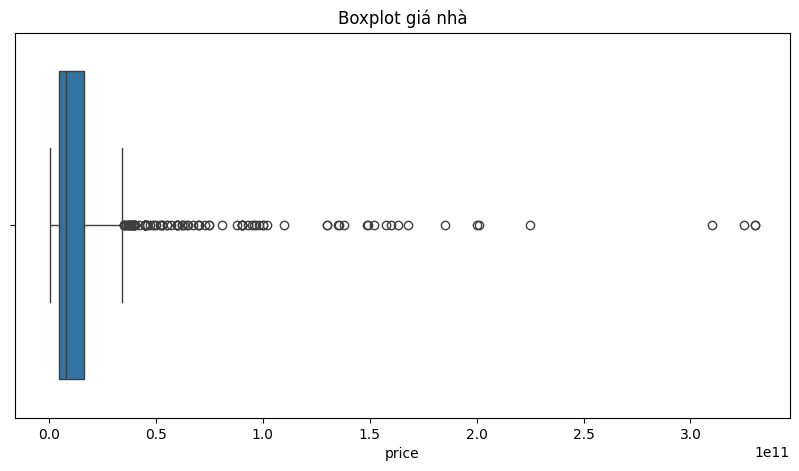

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_house['price'])
plt.title("Boxplot giá nhà")
plt.show()


#### Loại bỏ các giá trị outliers bằng cách chỉ lấy các giá trị thuộc vùng -13312500000.0 đến 34187500000.0

In [48]:
df_house_outlier=df_house[df_house['price']<=upper_price]

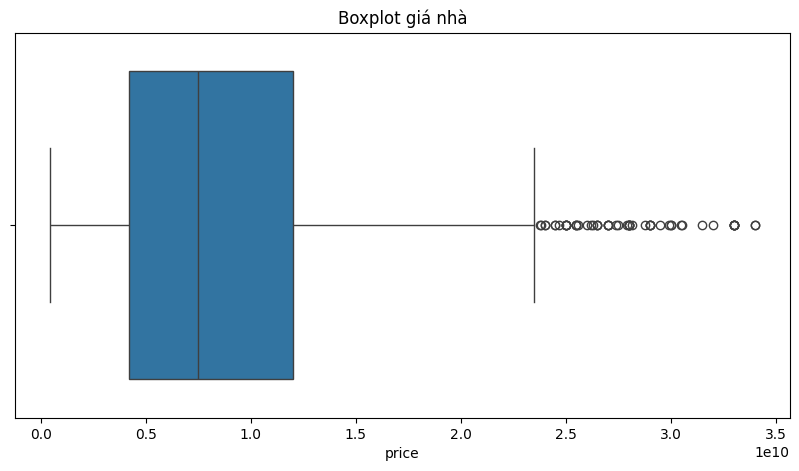

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_house_outlier['price'])
plt.title("Boxplot giá nhà")
plt.show()


### 4.2. Giá trị outlier cột square

#### Tương tự ta làm với cột Square

In [50]:
lower_square, upper_square= show_lower_upper_iqr(df_house_outlier,'square')
print(lower_square,upper_square)

-5.887499999999989 177.8125


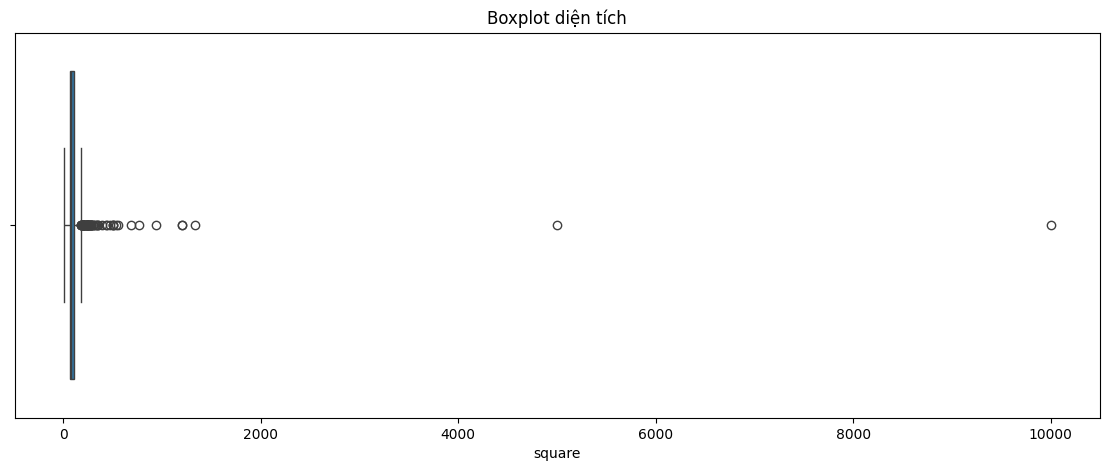

In [51]:
plt.figure(figsize=(14, 5))
sns.boxplot(x=df_house_outlier['square'])
plt.title("Boxplot diện tích")
plt.show()

In [52]:
df_house_outlier_1=df_house_outlier[df_house_outlier['square']<=upper_square]

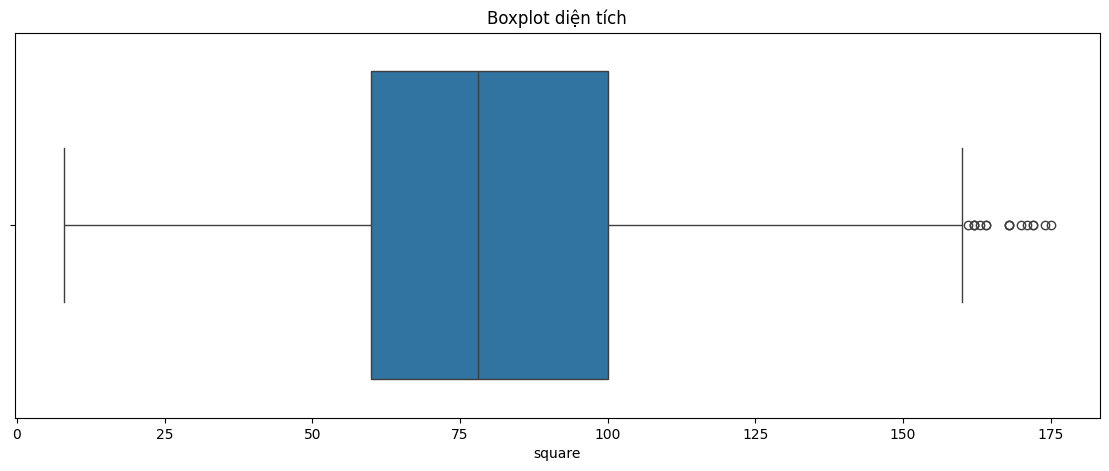

In [53]:
plt.figure(figsize=(14, 5))
sns.boxplot(x=df_house_outlier_1['square'])
plt.title("Boxplot diện tích")
plt.show()

### 4.3. Giá trị outlier cột price_per_square

#### Tương tự với cột price_per_square

In [54]:
lower_price_per_square, upper_price_per_square= show_lower_upper_iqr(df_house_outlier_1,'price_per_square')
print(lower_price_per_square,upper_price_per_square)

-80.84249999999997 291.2175


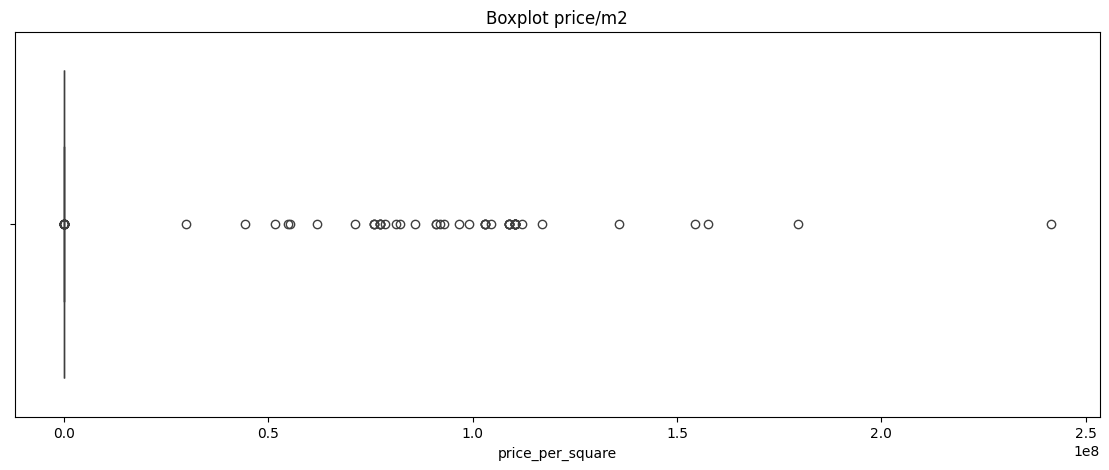

In [55]:
plt.figure(figsize=(14, 5))
sns.boxplot(x=df_house_outlier_1['price_per_square'])
plt.title("Boxplot price/m2")
plt.show()

In [56]:
df_house_outlier_done=df_house_outlier_1[df_house_outlier_1['price_per_square']<=upper_price_per_square]

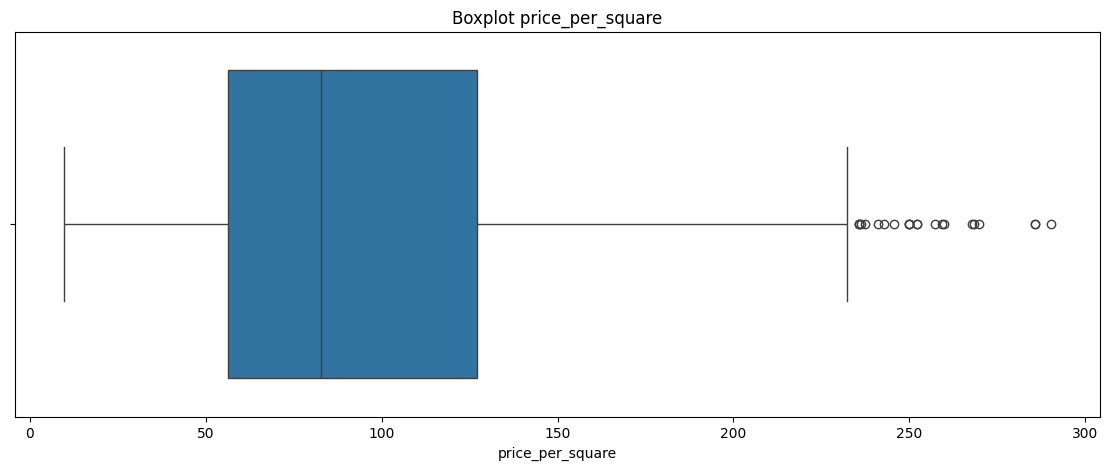

In [57]:
plt.figure(figsize=(14, 5))
sns.boxplot(x=df_house_outlier_done['price_per_square'])
plt.title("Boxplot price_per_square")
plt.show()

## 5. Thiết lập lại chỉ mục cho đúng theo thứ tự để tránh xáo trộn dữ liệu

In [58]:
df_house_outlier_done

,title,price,square,price_per_square,bedroom,wc,location,district
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,58.54,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,43.21,3.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,17.35,1.0,1.0,"Quận 9, Hồ Chí Minh",Quận 9
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,61.98,3.0,2.0,"Tân Phú, Hồ Chí Minh",Tân Phú
5,"GLORY HEIGHTS ĐỐT CHÁY THỊ TRƯỜNG CK 23%, THAN...",3.650000e+09,70.0,52.14,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
...,...,...,...,...,...,...,...,...
973,Bán gấp nhà mặt tiền kinh doanh đường số 6 sát...,1.020000e+10,95.6,106.70,1.0,1.0,"Thủ Đức, Hồ Chí Minh",Thủ Đức
974,Cần bán nhà ngay trung tâm chỉ 4tỷ950 dt 39m2 ...,4.950000e+09,36.0,137.50,2.0,2.0,"Quận 1, Hồ Chí Minh",Quận 1
975,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,42.65,2.0,2.0,"Thủ Đức, Hồ Chí Minh",Thủ Đức
977,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32.00,2.0,2.0,"Nhà Bè, Hồ Chí Minh",Nhà Bè


In [59]:
df_house_outlier_donee=df_house_outlier_done.reset_index(drop=True)
df_house_outlier_donee

,title,price,square,price_per_square,bedroom,wc,location,district
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,58.54,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,43.21,3.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,17.35,1.0,1.0,"Quận 9, Hồ Chí Minh",Quận 9
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,61.98,3.0,2.0,"Tân Phú, Hồ Chí Minh",Tân Phú
4,"GLORY HEIGHTS ĐỐT CHÁY THỊ TRƯỜNG CK 23%, THAN...",3.650000e+09,70.0,52.14,2.0,2.0,"Quận 9, Hồ Chí Minh",Quận 9
...,...,...,...,...,...,...,...,...
711,Bán gấp nhà mặt tiền kinh doanh đường số 6 sát...,1.020000e+10,95.6,106.70,1.0,1.0,"Thủ Đức, Hồ Chí Minh",Thủ Đức
712,Cần bán nhà ngay trung tâm chỉ 4tỷ950 dt 39m2 ...,4.950000e+09,36.0,137.50,2.0,2.0,"Quận 1, Hồ Chí Minh",Quận 1
713,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,42.65,2.0,2.0,"Thủ Đức, Hồ Chí Minh",Thủ Đức
714,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32.00,2.0,2.0,"Nhà Bè, Hồ Chí Minh",Nhà Bè


#### Sau khi làm sạch dử liệu ta còn 716 dòng và 8 cột

## 6. Lưu dữ liệu đã làm sạch vào file excel

In [ ]:
df_house_outlier_donee.to_excel('Data\DoneeAI.xlsx', index=False)

## 7. Trực quan hóa dữ liệu sau khi đã được làm sạch

In [65]:
df_house_done_clean=pd.read_excel('Data\DoneeAI.xlsx')

In [66]:
df_house_done_clean

,title,price,square,price_per_square,bedroom,wc,location,district
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,58.54,2,2,"Quận 9, Hồ Chí Minh",Quận 9
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,43.21,3,2,"Quận 9, Hồ Chí Minh",Quận 9
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,17.35,1,1,"Quận 9, Hồ Chí Minh",Quận 9
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,61.98,3,2,"Tân Phú, Hồ Chí Minh",Tân Phú
4,"GLORY HEIGHTS ĐỐT CHÁY THỊ TRƯỜNG CK 23%, THAN...",3.650000e+09,70.0,52.14,2,2,"Quận 9, Hồ Chí Minh",Quận 9
...,...,...,...,...,...,...,...,...
711,Bán gấp nhà mặt tiền kinh doanh đường số 6 sát...,1.020000e+10,95.6,106.70,1,1,"Thủ Đức, Hồ Chí Minh",Thủ Đức
712,Cần bán nhà ngay trung tâm chỉ 4tỷ950 dt 39m2 ...,4.950000e+09,36.0,137.50,2,2,"Quận 1, Hồ Chí Minh",Quận 1
713,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,42.65,2,2,"Thủ Đức, Hồ Chí Minh",Thủ Đức
714,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32.00,2,2,"Nhà Bè, Hồ Chí Minh",Nhà Bè


### 7.1. Biểu đồ phân bố giá nhà (Price)

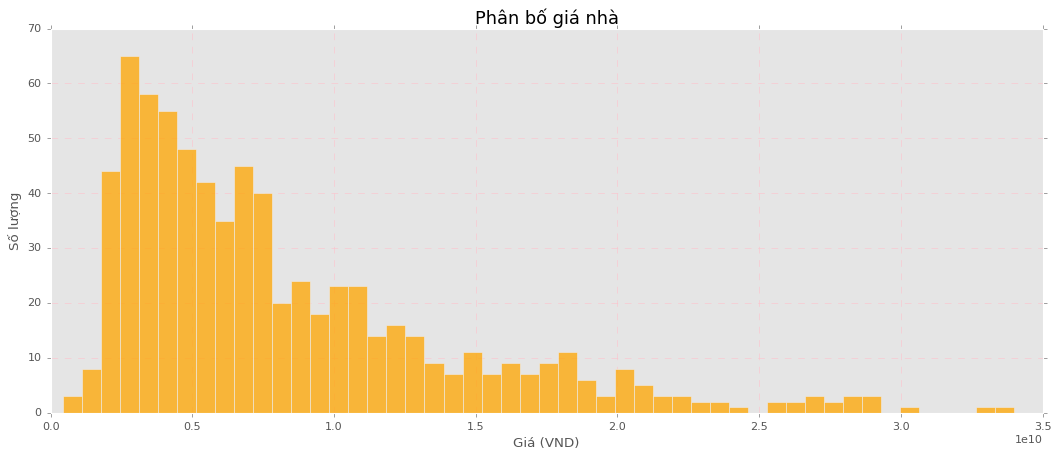

In [ ]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
sns.histplot(
    data=df_house_done_clean,
    x=df_house_done_clean['price'], bins=50, color='orange')
plt.title("Phân bố giá nhà", fontsize=16)
plt.xlabel("Giá (VND)",fontsize=12)
plt.ylabel("Số lượng",fontsize=12)
plt.grid(True, ls='--', color='pink')
plt.show()

####  Dựa vào biểu đồ ta thấy được giá nhà trong khoảng từ 2 tỷ đến 7 tỷ có số lượng khá lớn

### 7.2. Biểu đồ phân bố giá nhà theo trung bình quận (district)


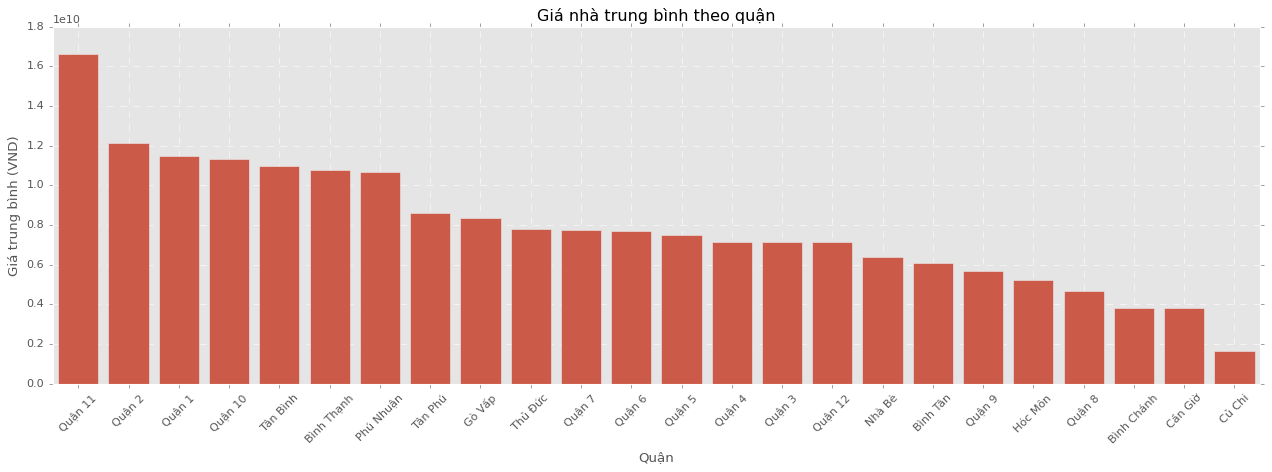

In [ ]:
plt.figure(figsize=(16,6))
avg_price_by_district = df_house_done_clean.groupby('district')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_district.index, y=avg_price_by_district.values)
plt.title("Giá nhà trung bình theo quận")
plt.ylabel("Giá trung bình (VND)")
plt.xlabel("Quận")
plt.xticks(rotation=45)
plt.grid(True, ls='--')
plt.tight_layout()
plt.show()

#### Dựa vào biểu đồ ta thấy được giá nhà trung bình ở quận 11  là cao nhất với khoảng hơn 16 tỷ và giá nhà trung bình ở quận Củ Chi là thấp nhất khoảng dưới 2 tỷ

### 7.3. Mối quan hệ giữa diện tích (square) và giá



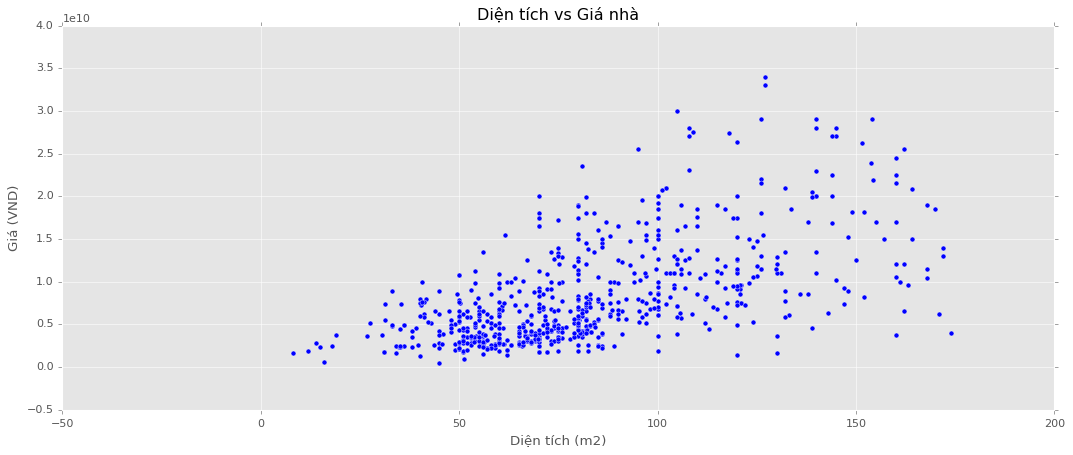

In [108]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df_house_done_clean, x='square', y='price')
plt.title("Diện tích vs Giá nhà")
plt.xlabel("Diện tích (m2)")
plt.ylabel("Giá (VND)")
plt.grid(True)
plt.show()


#### Biểu đồ thể hiện mối quan hệ giữa diện tích và giá nhà. Nhìn chung, diện tích càng lớn thì giá càng cao, thể hiện tương quan dương

### 7.4. Biểu đồ hộp (boxplot) giá theo số phòng ngủ


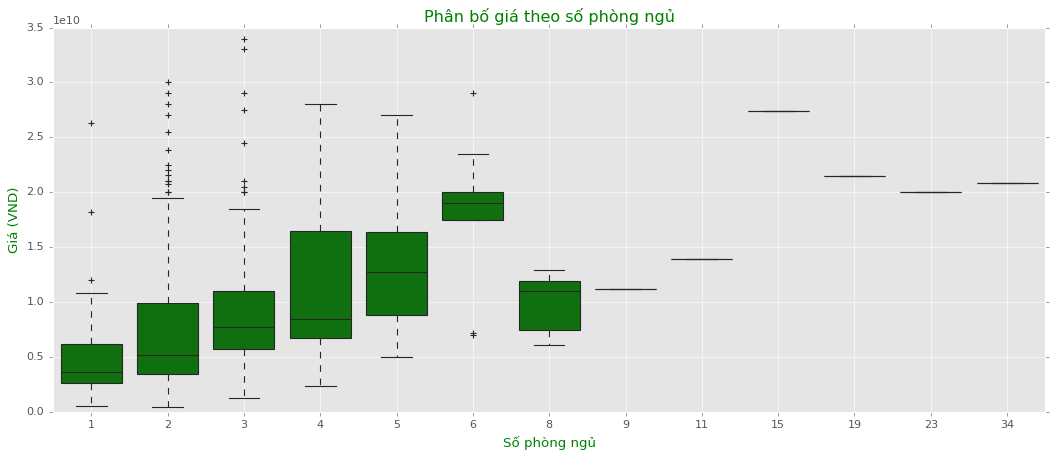

In [107]:
plt.figure(figsize=(16,6))
sns.boxplot(x='bedroom', y='price', data=df_house_done_clean, color='green')
plt.title("Phân bố giá theo số phòng ngủ", color='green')
plt.xlabel("Số phòng ngủ", color='green')
plt.ylabel("Giá (VND)", color='green')
plt.grid(True)
plt.show()


#### Biểu đồ thể hiện sự phân bố giá nhà (VND) theo số phòng ngủ. Nhìn chung, giá tăng dần theo số phòng ngủ, đặc biệt rõ từ 1 đến 5 phòng. Tuy nhiên, xuất hiện nhiều outlier (giá cao bất thường) ở các nhóm 2–5 phòng. Các nhóm có số phòng ngủ cao hơn (6–34) có ít dữ liệu nên không đại diện, nhưng giá trung bình vẫn cao hơn.

# III. Sử dụng mô hình Machine Learning Random Forest để dự đoán giá nhà

## 1. Dùng LabelEncoder cho cột district


In [67]:
df_house_cleaned=pd.read_excel('Data\DoneeAI.xlsx')

In [68]:
df_house_cleaned

,title,price,square,price_per_square,bedroom,wc,location,district
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.0,58.54,2,2,"Quận 9, Hồ Chí Minh",Quận 9
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.0,43.21,3,2,"Quận 9, Hồ Chí Minh",Quận 9
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.3,17.35,1,1,"Quận 9, Hồ Chí Minh",Quận 9
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.0,61.98,3,2,"Tân Phú, Hồ Chí Minh",Tân Phú
4,"GLORY HEIGHTS ĐỐT CHÁY THỊ TRƯỜNG CK 23%, THAN...",3.650000e+09,70.0,52.14,2,2,"Quận 9, Hồ Chí Minh",Quận 9
...,...,...,...,...,...,...,...,...
711,Bán gấp nhà mặt tiền kinh doanh đường số 6 sát...,1.020000e+10,95.6,106.70,1,1,"Thủ Đức, Hồ Chí Minh",Thủ Đức
712,Cần bán nhà ngay trung tâm chỉ 4tỷ950 dt 39m2 ...,4.950000e+09,36.0,137.50,2,2,"Quận 1, Hồ Chí Minh",Quận 1
713,"Siêu phẩm Lavita Garden 2PN, giá chỉ từ 2.9 tỷ...",2.900000e+09,68.0,42.65,2,2,"Thủ Đức, Hồ Chí Minh",Thủ Đức
714,Bán đất thổ cư KDC Nam Sài Gòn Nhà Bè DT 80124...,2.560000e+09,80.0,32.00,2,2,"Nhà Bè, Hồ Chí Minh",Nhà Bè


In [70]:
le = LabelEncoder()
df_house_cleaned['district_label'] = le.fit_transform(df_house_cleaned['district'])

# In ra ánh xạ tên quận với nhãn số
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_map)
# Xoá cột district ban đầu
# df = df.drop(columns=['district'])


Label mapping: {'Bình Chánh': 0, 'Bình Thạnh': 1, 'Bình Tân': 2, 'Cần Giờ': 3, 'Củ Chi': 4, 'Gò Vấp': 5, 'Hóc Môn': 6, 'Nhà Bè': 7, 'Phú Nhuận': 8, 'Quận 1': 9, 'Quận 10': 10, 'Quận 11': 11, 'Quận 12': 12, 'Quận 2': 13, 'Quận 3': 14, 'Quận 4': 15, 'Quận 5': 16, 'Quận 6': 17, 'Quận 7': 18, 'Quận 8': 19, 'Quận 9': 20, 'Thủ Đức': 21, 'Tân Bình': 22, 'Tân Phú': 23}


#### Dữ liệu sau khi được gán nhãn

In [71]:
df_house_cleaned.head(10)

,title,price,square,price_per_square,bedroom,wc,location,district,district_label
0,"ELYSIAN THỦ ĐỨC, GIỎ HÀNG NỘI BỘ CK ĐẾN 1X%, T...",4.800000e+09,82.00,58.54,2,2,"Quận 9, Hồ Chí Minh",Quận 9,20
1,DUY NHẤT CĂN 3PN FULL NỘI THẤT 3.5 TỶ /81M2 - ...,3.500000e+09,81.00,43.21,3,2,"Quận 9, Hồ Chí Minh",Quận 9,20
2,890 TRIỆU SỞ HỮU NGAY CĂN HỘ CÒN SÓT LẠI DUY N...,8.900000e+08,51.30,17.35,1,1,"Quận 9, Hồ Chí Minh",Quận 9,20
3,EM THƯ NHÂN VIÊN CĐT CHUYÊN RỔ HÀNG TẤT CẢ CÁC...,7.500000e+09,121.00,61.98,3,2,"Tân Phú, Hồ Chí Minh",Tân Phú,23
4,"GLORY HEIGHTS ĐỐT CHÁY THỊ TRƯỜNG CK 23%, THAN...",3.650000e+09,70.00,52.14,2,2,"Quận 9, Hồ Chí Minh",Quận 9,20
5,"CĂN HỘ LẦU 1 ĐẸP LUNG LINH, FULL NỘI THẤT - PH...",4.200000e+09,45.00,93.33,1,1,"Quận 1, Hồ Chí Minh",Quận 1,9
6,ELYSIAN THỦ ĐỨC 07/2025. TRỰC TIẾP CĐT - CK CA...,2.360000e+09,38.00,62.10,1,1,"Quận 9, Hồ Chí Minh",Quận 9,20
7,BẤT ĐỘNG SẢN PHÂN KHÚC 3 TỶ NÊN THAM KHẢO DỰ Á...,2.600000e+09,39.59,65.67,1,1,"Quận 9, Hồ Chí Minh",Quận 9,20
8,CHÍNH CHỦ BÁN NHÀ RẤT ĐẸP HẺM CÔ GIANG GẦN BỜ ...,7.200000e+09,64.00,112.50,2,2,"Phú Nhuận, Hồ Chí Minh",Phú Nhuận,8
9,THE RIVER THỦ THIÊM - CẬP NHẬT RỔ HÀNG CHUYỂN ...,2.000000e+10,140.00,142.86,3,2,"Quận 2, Hồ Chí Minh",Quận 2,13


## 2. Loại bỏ các cột không cần thiết

#### Bởi vì các cột title location district là các giá trị chuỗi và không giúp ích gì cho việc train model nên ta tiến hành loại bỏ chúng.

In [72]:
df_LableEncoder=df_house_cleaned.drop(columns=['title','location','district'])
df_LableEncoder.head()

,price,square,price_per_square,bedroom,wc,district_label
0,4.800000e+09,82.0,58.54,2,2,20
1,3.500000e+09,81.0,43.21,3,2,20
2,8.900000e+08,51.3,17.35,1,1,20
3,7.500000e+09,121.0,61.98,3,2,23
4,3.650000e+09,70.0,52.14,2,2,20


In [ ]:
df_LableEncoder.to_excel('Data\Lable.xlsx')

## 3. Tạo biến đầu vào X và đầu ra y

In [73]:
X=df_LableEncoder.drop(columns=['price'])
y=df_LableEncoder['price']

## 4. Huấn luyện mô hình Random Forest

In [74]:
# oob_sroce=True lấy những mẫu ko đc cây sử dụng để kiểm tra cây đó.
model=RandomForestRegressor(n_estimators=100, oob_score=True, random_state=41)
model.fit(X,y)

f:\TestAI\MLenv\lib\site-packages\sklearn\externals\array_api_compat\numpy\_aliases.py:127: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype=dtype, copy=copy)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


## 5. Kiểm tra độ chính xác của model

In [75]:
# oob độ chinh xác với các mẫu chưa thấy
oob_accuracy=model.oob_score_
print(f'Độ chính xác model với mẫu chưa thấy: {oob_accuracy}')
y_pred=model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
# R2 là độ khớp với dữ liệu đưa vào
print(f"R2 Score: {r2}")

Độ chính xác model với mẫu chưa thấy: 0.9904276981303567
Mean Squared Error: 4.561905381955307e+16
R2 Score: 0.998720140804074


## 6. Minh họa đặc trưng quan trọng, độ chính xác của mô hình, sai số dự đoán 

### 6.1. Đặc trưng quan trọng

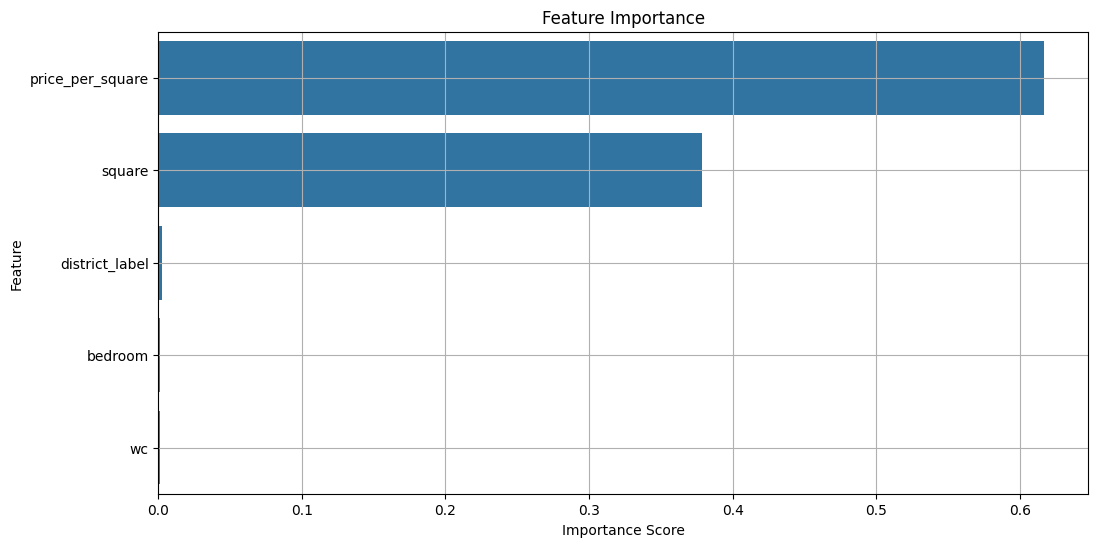

In [76]:

importances = model.feature_importances_
features = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(len(importances))]
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


### 6.2. Độ chính xác của mô hình

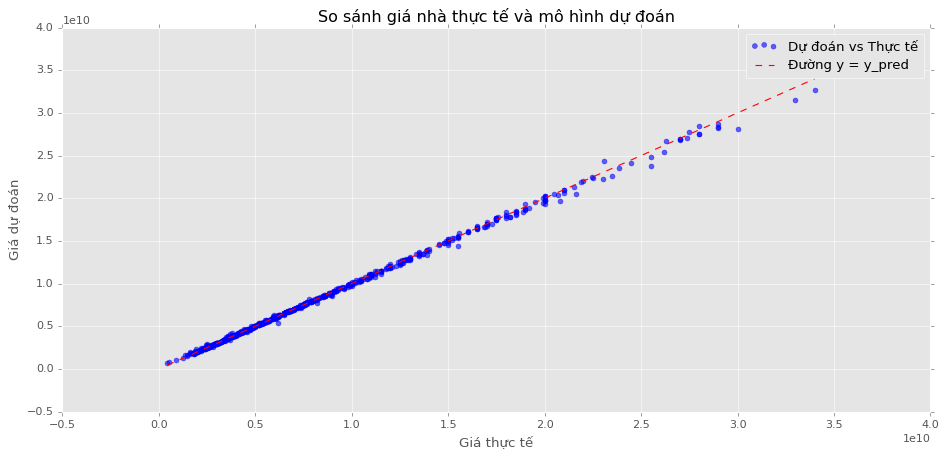

In [ ]:

plt.figure(figsize=(14,6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Dự đoán vs Thực tế')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Đường y = y_pred')
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("So sánh giá nhà thực tế và mô hình dự đoán")
plt.legend()
plt.grid(True)
plt.show()

#### Nhận xét:  
- Dựa vào biểu đồ ta thấy các chấm xanh nằm rất gần đường màu đỏ => giá trị dự đoán có độ chính xác cao.
- Đường đỏ là đường lý tưởng: mọi điểm nằm trên đó có nghĩa là y_pred = y (mô hình dự đoán đúng tuyệt đối).

### 6.3. Sai số dự đoán

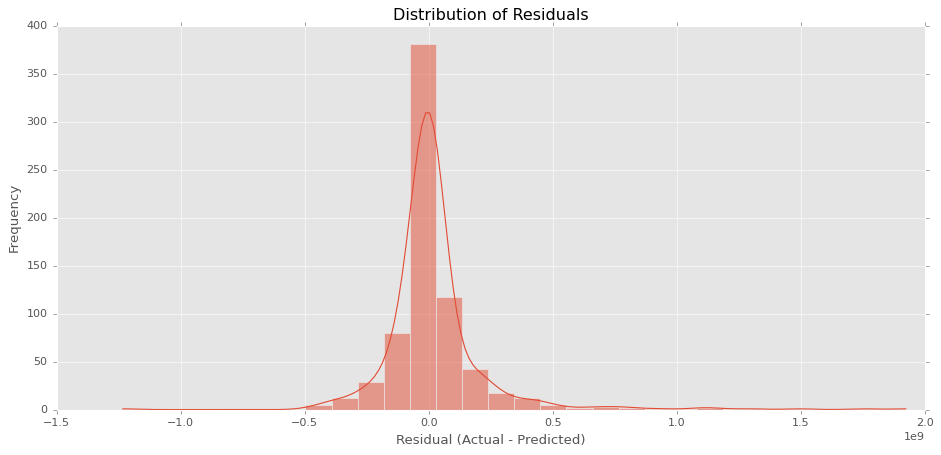

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(14,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### Nhận xét:
- Ta thấy phần lớn giá trị rời vào khoảng -500(ngĩa là giá trị thực tế thấp hơn giá trị dự đoán) đến 500tr và tập trung
nhiều ở cột 0.0(nghĩa là độ lệch hầu như không có) => Mô hình dự đoán tốt.

## 7. Tiến hành dự đoán giá nhà

#### Ta sẽ cho mô hình dự đoán giá nhà với square:62, price_per_square:63.71, bedroom:2, wc:2, district_lable: Quận 7

In [77]:
# Dữ liệu đầu vào và mã hóa district
new_data = {
    'square': 62,
    'price_per_square': 63.71,
    'bedroom': 2,
    'wc': 2,
    'district_label': le.transform(['Quận 7'])[0]
}

#### Kết quả dự đoán nhận được 

In [78]:
X_new = pd.DataFrame([new_data])
predicted_price = model.predict(X_new)[0]
print(f"✅ Giá nhà dự đoán: {predicted_price:,.0f} VNĐ")


✅ Giá nhà dự đoán: 3,814,500,000 VNĐ


## 8. Lưu Meachine Learning và le (LabelEncoder) 

In [14]:
# model = joblib.load("models/house_price_model.pkl")
# le = joblib.load("models/district_label_encoder.pkl")
joblib.dump(model, "models/house_price_model.pkl")
joblib.dump(le, "models/district_label_encoder.pkl")

['models/district_label_encoder.pkl']

# <hr>